In [1]:
import pandas as pd
import chardet
import requests

url = 'https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv'
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']
df = pd.read_csv(url, encoding=encoding)
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
df.columns = ["label", "text"]
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.columns

Index(['label', 'text'], dtype='object')

In [4]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [5]:
df.dropna()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.shape

(5572, 2)

In [7]:
import matplotlib.pyplot as plt

ham_count = df["label"].value_counts()["ham"]
spam_count = df["label"].value_counts()["spam"]
spam_count, ham_count

(747, 4825)

<BarContainer object of 2 artists>

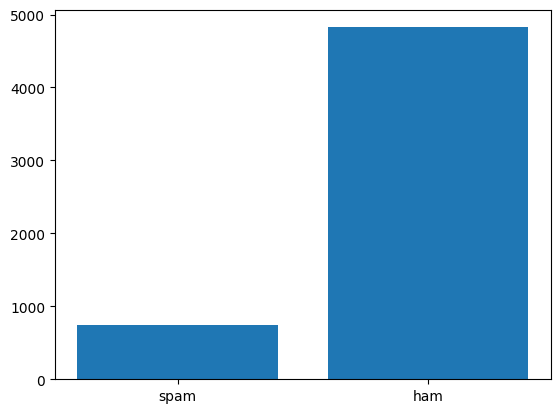

In [8]:
plt.bar(["spam", "ham"], [spam_count, ham_count])

In [9]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\udayp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\udayp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\udayp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\udayp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\udayp\AppData\Roaming\nltk_data...
[

True

In [10]:
text = list(df["text"])
text

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had y

In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [12]:
corpus = []
for i in range(len(text)):
    r = re.sub('[^a-zA-z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = " ".join(r)
    corpus.append(r)
print(text[i])
print(r)
print(corpus)

Rofl. Its true to its name
rofl true name
['go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'ok lar joking wif u oni', 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply', 'u dun say early hor u c already say', 'nah think go usf life around though', 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv', 'even brother like speak treat like aid patent', 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune', 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour', 'mobile month u r entitled update latest colour mobile camera free call mobile update co free', 'gonna home soon want talk stuff anymore tonight k cried enough today', 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info', 'urgent week free membership prize jackpot txt word claim c www 

In [13]:
df['text'] = corpus
df.head()

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [14]:
df["label"] = df["label"].replace({'spam' : 1, 'ham' : 0})
df

,label,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though
...,...,...
5567,1,nd time tried contact u u pound prize claim ea...
5568,0,_ b going esplanade fr home
5569,0,pity mood suggestion
5570,0,guy bitching acted like interested buying some...


In [15]:
X = df["text"]
y = df["label"]

In [16]:
X, y

(0       go jurong point crazy available bugis n great ...
 1                                 ok lar joking wif u oni
 2       free entry wkly comp win fa cup final tkts st ...
 3                     u dun say early hor u c already say
 4                     nah think go usf life around though
                               ...                        
 5567    nd time tried contact u u pound prize claim ea...
 5568                          _ b going esplanade fr home
 5569                                 pity mood suggestion
 5570    guy bitching acted like interested buying some...
 5571                                       rofl true name
 Name: text, Length: 5572, dtype: object,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 5567    1
 5568    0
 5569    0
 5570    0
 5571    0
 Name: label, Length: 5572, dtype: int64)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_vectorize = cv.fit_transform(X)
X_vectorize

<5572x7048 sparse matrix of type '<class 'numpy.int64'>'
	with 44875 stored elements in Compressed Sparse Row format>

In [18]:
X_vectorize.shape, y.shape

((5572, 7048), (5572,))

In [19]:
X_vectorize.dtype, y.dtype

(dtype('int64'), dtype('int64'))

In [20]:
import torch
X_vectorize_tensor = torch.tensor(X_vectorize.toarray(), dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.float)
X_vectorize_tensor, y_tensor

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0., 0., 1.,  ..., 0., 0., 0.]))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vectorize_tensor,
                                                    y_tensor,
                                                    test_size=0.2,
                                                    random_state=42)
X_train, X_test, y_train, y_test

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0., 1., 0.,  ..., 0., 0., 0.]),
 tensor([0., 0., 1.,  ..., 0., 0., 1.]))

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([4457, 7048]),
 torch.Size([1115, 7048]),
 torch.Size([4457]),
 torch.Size([1115]))

In [23]:
from torch import nn
from torchinfo import summary

In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [25]:
class spamdetectionv0(nn.Module):
    def __init__(self, input_features, output_features, hidden_units):
        super().__init__()

        self.linear_1 = nn.Linear(in_features=input_features, out_features=hidden_units )
        self.linear_2 = nn.Linear(in_features=hidden_units, out_features=hidden_units )
        self.linear_3 = nn.Linear(in_features=hidden_units, out_features=output_features)
        self.relu = nn.ReLU()

    def forward(self, x):

        z = self.linear_1(x)
        z = self.relu(z)
        z = self.linear_2(z)
        z = self.relu(z)
        z = self.linear_3(z)

        return z

In [26]:
spamdetectionmodelv0 = spamdetectionv0(input_features=7048,
                                       output_features=1,
                                       hidden_units=64).to(device)
spamdetectionmodelv0

spamdetectionv0(
  (linear_1): Linear(in_features=7048, out_features=64, bias=True)
  (linear_2): Linear(in_features=64, out_features=64, bias=True)
  (linear_3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)

In [27]:
summary(spamdetectionmodelv0, input_size=[1, 7048])

Layer (type:depth-idx)                   Output Shape              Param #
spamdetectionv0                          [1, 1]                    --
├─Linear: 1-1                            [1, 64]                   451,136
├─ReLU: 1-2                              [1, 64]                   --
├─Linear: 1-3                            [1, 64]                   4,160
├─ReLU: 1-4                              [1, 64]                   --
├─Linear: 1-5                            [1, 1]                    65
Total params: 455,361
Trainable params: 455,361
Non-trainable params: 0
Total mult-adds (M): 0.46
Input size (MB): 0.03
Forward/backward pass size (MB): 0.00
Params size (MB): 1.82
Estimated Total Size (MB): 1.85

In [28]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=spamdetectionmodelv0.parameters(),
                            lr=0.01)

In [29]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [30]:
torch.manual_seed(42)

train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []
epoch_count = []

epochs = 10

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

    epoch_count.append(epoch)

    # training

    spamdetectionmodelv0.train()

    y_logits = spamdetectionmodelv0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train,
                      y_pred = y_pred)
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    train_losses.append(loss.detach().cpu().numpy())
    train_accuracy.append(acc)

    #testing

    with torch.inference_mode():

        test_logits = spamdetectionmodelv0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test,
                               y_pred = test_pred)
        
        test_losses.append(test_loss.detach().cpu().numpy())
        test_accuracy.append(test_acc)

    # if epoch % 100 == 0:
    print(f"Epoch: {epoch} | loss: {loss} | accuracy: {acc}% | test loss: {test_loss} | test accuracy: {test_acc}%")
    

Epoch: 0 | loss: 0.7059823870658875 | accuracy: 13.394660085259144% | test loss: 0.7041489481925964 | test accuracy: 13.452914798206278%
Epoch: 1 | loss: 0.7042186260223389 | accuracy: 13.417096701817366% | test loss: 0.7023981213569641 | test accuracy: 13.452914798206278%
Epoch: 2 | loss: 0.7024649381637573 | accuracy: 13.417096701817366% | test loss: 0.7006573677062988 | test accuracy: 13.452914798206278%
Epoch: 3 | loss: 0.7007213234901428 | accuracy: 13.417096701817366% | test loss: 0.6989266276359558 | test accuracy: 13.452914798206278%
Epoch: 4 | loss: 0.6989876627922058 | accuracy: 13.417096701817366% | test loss: 0.6972059607505798 | test accuracy: 13.452914798206278%
Epoch: 5 | loss: 0.6972638368606567 | accuracy: 13.461969934933812% | test loss: 0.6954949498176575 | test accuracy: 14.080717488789238%
Epoch: 6 | loss: 0.6955499649047852 | accuracy: 13.708772717074266% | test loss: 0.6937938928604126 | test accuracy: 25.02242152466368%
Epoch: 7 | loss: 0.6938457489013672 | accu

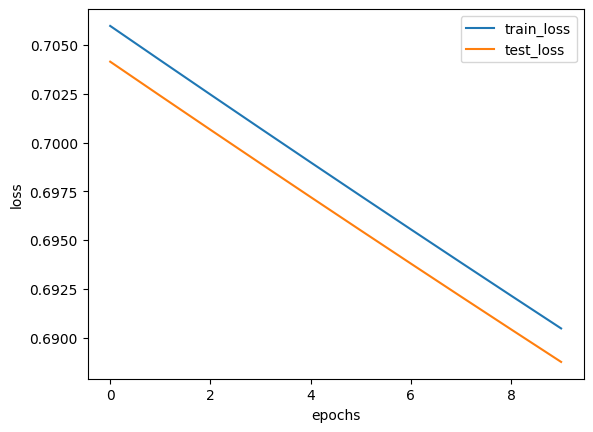

In [31]:
import matplotlib.pyplot as plt
plt.plot(epoch_count, train_losses, label = 'train_loss')
plt.plot(epoch_count, test_losses, label = 'test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

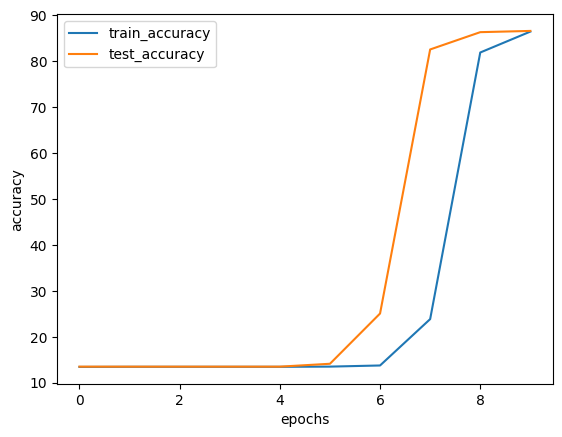

In [32]:
plt.plot(epoch_count, train_accuracy, label = 'train_accuracy')
plt.plot(epoch_count, test_accuracy, label = 'test_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()